# <font color='red'> Spoken Digit Recognition</font>


In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>Instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. Please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!gdown --id  17YGQheavMbM6aeHYjUcGssXfb7eQHo1z

In [ ]:
import numpy as np
import pandas as pd
import librosa
import os
##if you need any imports you can do that here. 

We shared recordings.zip, please unzip those. 

In [ ]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"


In [ ]:

!unzip -qn  "../input/spokenndigit/recordings" 


unzip:  cannot find or open ../input/spokenndigit/recordings, ../input/spokenndigit/recordings.zip or ../input/spokenndigit/recordings.ZIP.


In [ ]:
import os
files=os.listdir('../input/spokenndigit/recordings')
all_files=[]
for f in files:
  name=str(f)
  all_files.append(name)

In [ ]:
len(all_files)

2000

<font size=4>Grader function 1 </font>

In [ ]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

In [ ]:
label=[]
for i in range(2000):
  label.append(int(all_files[i].split('_')[0]))

In [ ]:
import pandas as pd
df_audio=pd.DataFrame()
df_audio['path']=all_files
df_audio['label']=label

In [ ]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


## Exploring the sound dataset

In [ ]:
#It is a good programming practise to explore the dataset that you are dealing with. This dataset is unique in itself because it has sounds as input
#https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb
#visualize the data and write code to play 2-3 sound samples in the notebook for better understanding.
#please go through the following reference video https://www.youtube.com/watch?v=37zCgCdV468

## Creating dataframe

In [ ]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0


In [ ]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [ ]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [ ]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [ ]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_audio['path'],df_audio['label'], test_size=0.3,
stratify=df_audio['label'],random_state=45)

<font size=4>Grader function 3 </font>

In [ ]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [ ]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [ ]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train
import librosa
from tqdm import tqdm
a1=[]
a2=[]
b1=[]
b2=[]
for i in tqdm(range(X_train.shape[0])):
  a1.append(load_wav('../input/spokenndigit/recordings/'+X_train.values[i])[0])
  a2.append(load_wav('../input/spokenndigit/recordings/'+X_train.values[i])[1])
for i in tqdm(range(X_test.shape[0])):
  b1.append(load_wav('../input/spokenndigit/recordings/'+X_test.values[i])[0])
  b2.append(load_wav('../input/spokenndigit/recordings/'+X_test.values[i])[1])

  0%|          | 0/1400 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Pass y=[ 1.4801990e-05  1.0912882e-04  1.8360981e-04 ... -1.2996758e-04
 -1.6474516e-04  0.0000000e+00], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  import sys
  0%|          | 1/1400 [00:00<18:40,  1.25it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Pass y=[ 0.0004334   0.00160146  0.00125241 ... -0.02079769 -0.01251514
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Pass y=[8.1915627e-05 2.4656046e-04 1.9301260e-04 ... 8.1996399e-04 9.6768927e-04
 0.0000000e+00], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  import sys
/opt/conda/lib/python3.7/si

In [ ]:
print(len(a1))
print(len(a2))
print(len(b1))
print(len(b2))

1400
1400
600
600


In [ ]:
X_train_processed=pd.DataFrame()
X_test_processed=pd.DataFrame()
X_train_processed['raw_data']=a1
X_train_processed['duration']=a2
X_test_processed['raw_data']=b1
X_test_processed['duration']=b2

array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

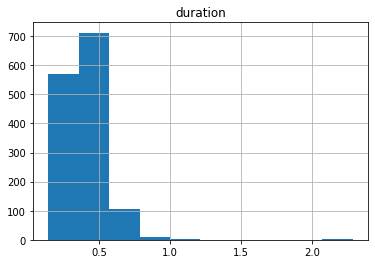

In [ ]:
#plot the histogram of the duration for trian
X_train_processed.hist(column='duration')

array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

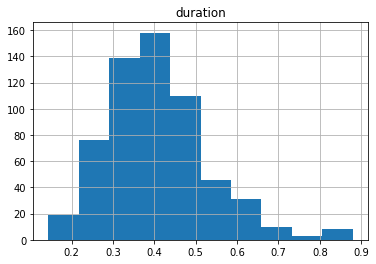

In [ ]:
#plot the histogram of the duration for trian
#plot the histogram of the duration for trian
X_test_processed.hist(column='duration')

In [ ]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
#print 0 to 100 percentile values with step size of 10 for train data duration.
import numpy as np
for i in range(0,101,10):
  if i%10==0:
    print(i,' th percentile is : ',np.percentile(X_train_processed['duration'], i))

0  th percentile is :  0.1435374149659864
10  th percentile is :  0.2591020408163265
20  th percentile is :  0.297750566893424
30  th percentile is :  0.33048072562358277
40  th percentile is :  0.35586394557823126
50  th percentile is :  0.38589569160997733
60  th percentile is :  0.413124716553288
70  th percentile is :  0.4444671201814059
80  th percentile is :  0.4813424036281179
90  th percentile is :  0.5528934240362812
100  th percentile is :  2.282766439909297


In [ ]:
##print 90 to 100 percentile values with step size of 1. 
for i in range(90,101):
  print(i,' th percentile is : ',np.percentile(X_train_processed['duration'], i))

90  th percentile is :  0.5528934240362812
91  th percentile is :  0.561917006802721
92  th percentile is :  0.5759256235827664
93  th percentile is :  0.5915578231292521
94  th percentile is :  0.6101587301587301
95  th percentile is :  0.622421768707483
96  th percentile is :  0.6385142857142857
97  th percentile is :  0.6582875283446712
98  th percentile is :  0.6883972789115647
99  th percentile is :  0.7654394557823128
100  th percentile is :  2.282766439909297


<font size=4>Grader function 4 </font>

In [ ]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<b>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset.</b>

<b>While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640
</b>
<b>Pad with Zero if length of sequence is less than 17640 else Truncate the number. </b>

<b> Also create a masking vector for train and test. </b>

<b> masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.</b>


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input,Activation,BatchNormalization,Dropout,Embedding,LSTM,Flatten,Conv1D,MaxPool1D,GlobalAveragePooling3D
from tensorflow.keras.models import Model
import random as rn
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint ,TensorBoard,EarlyStopping,LearningRateScheduler
#from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow.keras.layers import concatenate

In [ ]:
max_seq_length=17640
X_train_pad_seq=[] #np.zeros((1400,17640))
X_train_mask= [] #np.zeros((1400,17640))
for i in tqdm(range(X_train_processed.shape[0])):
  # pad if len less than max_seq_length
  if len(X_train_processed['raw_data'].values[i]) < max_seq_length:
    seq=X_train_processed['raw_data'].values[i].tolist()+ \
    [0 for item in range(max_seq_length-len(X_train_processed['raw_data'].values[i]))]
  else:
    # Truncate if len greater then max_seq_length
    seq = X_train_processed['raw_data'].values[i].tolist()[:max_seq_length]
  #mask=[1 if x!=0 else 0 for x in tokens]
  mask=[1 if x!=0 else 0 for x in seq]
  mask=[bool(x) for x in mask]
  X_train_pad_seq.append(seq)
  X_train_mask.append(mask)

100%|██████████| 1400/1400 [00:05<00:00, 264.13it/s]


In [ ]:
X_train_pad_seq=np.array(X_train_pad_seq)
X_train_mask=np.array(X_train_mask)

In [ ]:
X_test_processed.shape

(600, 2)

In [ ]:
max_seq_length=17640
X_test_pad_seq=[] #np.zeros((600,17640))
X_test_mask=[] #np.zeros((600,17640))
for i in tqdm(range(X_test_processed.shape[0])):
  # pad if len less than
  if len(X_test_processed['raw_data'].values[i]) < max_seq_length:
    # Add the ['PAD'] token
    seq=X_test_processed['raw_data'].values[i].tolist()+[0 for item in range(max_seq_length-len(X_test_processed['raw_data'].values[i]))]
  else:
    # Truncate the tokens at maxLen - 1 and add a '[SEP]' tag.
    seq = X_test_processed['raw_data'].values[i].tolist()[:max_seq_length]
  #mask=[1 if x!=0 else 0 for x in tokens]
  mask=[1 if x!=0 else 0 for x in seq]
  mask=[bool(x) for x in mask]
  X_test_pad_seq.append(seq)
  X_test_mask.append(mask)

100%|██████████| 600/600 [00:02<00:00, 263.16it/s]


In [ ]:
X_test_pad_seq=np.array(X_test_pad_seq)
X_test_mask=np.array(X_test_mask)

In [ ]:
X_test_mask[i]

array([ True,  True,  True, ..., False, False, False])

In [ ]:
max_length  = 17640

In [ ]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask

## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.

<font size=4>Grader function 5 </font>

In [ ]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

### 1. Giving Raw data directly. 


Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). Also check the datatype of class labels(y_values) and make sure that you convert your class labels  to integer datatype before fitting in the model.
3. While defining your model make sure that you pass both the input layer and mask input layer as input to lstm layer as follows
<img src='https://i.imgur.com/FvcgvbY.jpg'>
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 

5. make sure that it won't overfit. 
6. You are free to include any regularization


In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
## as discussed above, please write the architecture of the model.
## you will have two input layers in your model (data input layer and mask input layer)
## make sure that you have defined the data type of masking layer as bool
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)
y_train_ohe = tf.keras.utils.to_categorical(y_train_encoded)
y_test_ohe = tf.keras.utils.to_categorical(y_test_encoded)

In [ ]:
y_test_ohe[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
## as discussed above, please write the LSTM
input1 = Input(shape=(17640, 1,))
input_mask=Input(shape=(17640,),dtype=bool)
LSTM_layer= LSTM(50,dropout=0.2)(inputs=input1,mask=input_mask)
x = Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(LSTM_layer)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Dense(12,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(x)
x = Dropout(0.35)(x)
x = BatchNormalization()(x)
x = Dense(8,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
dense = Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.00001))(x)
Out = Dense(units=10,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(dense)
model1= Model(inputs=(input1,input_mask),outputs=Out)

In [ ]:
import tensorflow as tf
import keras.backend as K
import os
import datetime
#https://www.kaggle.com/c/liverpool-ion-switching/discussion/132646
def f1(y_true, y_pred):
  y_pred = K.round(y_pred)
  tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
  # tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
  fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
  fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)
  p = tp / (tp + fp + K.epsilon())
  r = tp / (tp + fn + K.epsilon())
  f1 = 2*p*r / (p+r+K.epsilon())
  f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
  return K.mean(f1)

In [ ]:
!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.9 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.14.0
    Uninstalling tensorflow-addons-0.14.0:
      Successfully uninstalled tensorflow-addons-0.14.0


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


In [ ]:
#https://stackoverflow.com/questions/43263111/defining-an-auc-metric-for-keras-to-support-evaluation-of-validation-dataset
def auc( y_true, y_pred ) :
  score = tf.py_function( lambda y_true, y_pred : f1_score( y_true, y_pred, average='micro', sample_weight=None).astype('float32'),[y_true, y_pred],'float32', )
  return score

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
#tensorbord for model1
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
%tensorboard --logdir $logdir

2022-05-19 19:39:37.827676: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-19 19:39:37.828266: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-05-19 19:39:38.075510: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-19 19:39:38.075693: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=[tfa.metrics.F1Score(num_classes=10,name='f1_score',average='micro')])

In [ ]:
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 17640)]      0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 50)           10400       input_4[0][0]                    
                                                                 input_5[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 16)           816         lstm_2[0][0]               

In [ ]:
#train your model
model1.fit([X_train_pad_seq,X_train_mask],y_train_ohe,epochs=5, validation_data=([X_test_pad_seq,X_test_mask],y_test_ohe), batch_size=32,
callbacks=[tensorboard_callback])

Epoch 1/5
 1/44 [..............................] - ETA: 3:18 - loss: 2.3998 - f1_score: 0.1250

2022-05-19 19:39:46.366914: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-19 19:39:46.366967: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/44 [>.............................] - ETA: 38s - loss: 2.5639 - f1_score: 0.0938 

2022-05-19 19:39:47.264879: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-05-19 19:39:47.301715: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-05-19 19:39:47.438233: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 54258 callback api events and 54255 activity events. 
2022-05-19 19:39:48.434145: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-19 19:39:50.208025: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/20220519-193937/train/plugins/profile/2022_05_19_19_39_48

2022-05-19 19:39:51.022744: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/20220519-193937/train/plugins/profile/2022_05_19_19_39_48/d16476142c60.trace.json.gz
2022-05-19 19:39:51.741313: I tensorflow/core/profiler/rpc/client/save_profile.cc:136]

44/44 [==============================] - 38s 767ms/step - loss: 2.6266 - f1_score: 0.0850 - val_loss: 2.3833 - val_f1_score: 0.1000
Epoch 2/5
44/44 [==============================] - 28s 630ms/step - loss: 2.5884 - f1_score: 0.1014 - val_loss: 2.4005 - val_f1_score: 0.1000
Epoch 3/5
44/44 [==============================] - 27s 609ms/step - loss: 2.5764 - f1_score: 0.1036 - val_loss: 2.4184 - val_f1_score: 0.1000
Epoch 4/5
44/44 [==============================] - 27s 609ms/step - loss: 2.5672 - f1_score: 0.1093 - val_loss: 2.4338 - val_f1_score: 0.1000
Epoch 5/5
44/44 [==============================] - 27s 628ms/step - loss: 2.5429 - f1_score: 0.1121 - val_loss: 2.4424 - val_f1_score: 0.1000


In [ ]:
from IPython.display import Image
Image('/content/Screenshot (225).png',width=800,height=500)

FileNotFoundError: No such file or directory: '/content/Screenshot (225).png'

FileNotFoundError: No such file or directory: '/content/Screenshot (225).png'

<IPython.core.display.Image object>

In [ ]:
from IPython.display import Image
Image('/content/Screenshot (226).png',width=800,height=500)

FileNotFoundError: No such file or directory: '/content/Screenshot (226).png'

FileNotFoundError: No such file or directory: '/content/Screenshot (226).png'

<IPython.core.display.Image object>

### 2. Converting into spectrogram and giving spectrogram data as input  

We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram


In [ ]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [ ]:
X_train_spectrogram=[]
X_test_spectrogram=[]
for i in tqdm(range(X_train_processed.shape[0])):
  X_train_spectrogram.append(convert_to_spectrogram(X_train_pad_seq[i]))
for i in tqdm(range(X_test_processed.shape[0])):
  X_test_spectrogram.append(convert_to_spectrogram(X_test_pad_seq[i]))

100%|██████████| 600/600 [00:04<00:00, 145.66it/s]


In [ ]:
X_train_spectrogram = np.array(X_train_spectrogram)
X_test_spectrogram = np.array(X_test_spectrogram)

<font size=4>Grader function 6 </font>

In [ ]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True


Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (None, time_steps, features) average the output of every time step i.e, you should get (None,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 
5. make sure that it won't overfit. 
6. You are free to include any regularization


In [ ]:
# write the architecture of the model
#print model.summary and make sure that it is following point 2 mentioned above

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense,GlobalAveragePooling1D,GlobalAveragePooling2D,GlobalAvgPool3D
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
## as discussed above, please write the LSTM
input1 = Input(shape=(64, 35,))
LSTM_layer= LSTM(256,dropout=0.01,return_sequences=True)(input1)
#tr = tf.transpose(LSTM_layer,perm=[0, 2, 1])
avg=GlobalAveragePooling1D(data_format='channels_last')(LSTM_layer)
x = Dense(256,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=31),kernel_regularizer=l2(0.0001))(avg)
x = Dropout(0.01)(x)
x = BatchNormalization()(x)
x = Dense(128,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=43),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.01)(x)
x = BatchNormalization()(x)
x = Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=54),kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)
dense = Dense(32,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=40),kernel_regularizer=l2(0.0001))(x)
Out = Dense(units=10,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=45),name='Output')(dense)
model2= Model(inputs=input1,outputs=Out)

In [ ]:
model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 64, 35)]          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64, 256)           299008    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               3289

In [ ]:
#tensorbord for model1
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
%tensorboard --logdir $logdir

2022-05-19 19:42:20.078434: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-19 19:42:20.078486: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-05-19 19:42:20.239025: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-19 19:42:20.239209: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
def changeLearningRate(epochs,learning_rate):
  if epochs<50:
    learning_rate=0.001
    return learning_rate
  elif epochs<75 and epochs>125:
    learning_rate=0.0001
    return learning_rate
  else:
    learning_rate=0.000001
    return learning_rate
lrschedule = LearningRateScheduler(changeLearningRate,verbose=1)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=[tfa.metrics.F1Score(num_classes=10,name='f1_score',average='micro')])

In [ ]:
model2.fit(X_train_spectrogram,y_train_ohe,epochs=200, validation_data=(X_test_spectrogram,y_test_ohe),
batch_size=50,
callbacks=[tensorboard_callback,lrschedule])

Epoch 1/200

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
 1/28 [>.............................] - ETA: 1:01 - loss: 2.9187 - f1_score: 0.1600

2022-05-19 19:42:25.897439: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-19 19:42:25.897483: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/28 [=>............................] - ETA: 7s - loss: 2.9564 - f1_score: 0.1100  

2022-05-19 19:42:26.215775: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-05-19 19:42:26.217014: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-05-19 19:42:26.351418: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 640 callback api events and 637 activity events. 
2022-05-19 19:42:26.364815: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-19 19:42:26.381013: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/20220519-194220/train/plugins/profile/2022_05_19_19_42_26

2022-05-19 19:42:26.390445: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/20220519-194220/train/plugins/profile/2022_05_19_19_42_26/d16476142c60.trace.json.gz
2022-05-19 19:42:26.407981: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Cre

28/28 [==============================] - 4s 52ms/step - loss: 2.4338 - f1_score: 0.2193 - val_loss: 2.3358 - val_f1_score: 0.1700
Epoch 2/200

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
28/28 [==============================] - 0s 11ms/step - loss: 1.9062 - f1_score: 0.3664 - val_loss: 2.2035 - val_f1_score: 0.3017
Epoch 3/200

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
28/28 [==============================] - 0s 15ms/step - loss: 1.6642 - f1_score: 0.4529 - val_loss: 2.1720 - val_f1_score: 0.2583
Epoch 4/200

Epoch 00004: LearningRateScheduler setting learning rate to 0.001.
28/28 [==============================] - 0s 11ms/step - loss: 1.4776 - f1_score: 0.5229 - val_loss: 2.0471 - val_f1_score: 0.3133
Epoch 5/200

Epoch 00005: LearningRateScheduler setting learning rate to 0.001.
28/28 [==============================] - 0s 11ms/step - loss: 1.3302 - f1_score: 0.5643 - val_loss: 1.8409 - val_f1_score: 0.3667
Epoch 6/200

Epoch 00006: Lear

In [ ]:
from IPython.display import Image
Image('/content/Screenshot (72).png',width=1000,height=500)

FileNotFoundError: No such file or directory: '/content/Screenshot (72).png'

FileNotFoundError: No such file or directory: '/content/Screenshot (72).png'

<IPython.core.display.Image object>

In [ ]:
from IPython.display import Image
Image('/content/Screenshot (73).png',width=1000,height=500)

FileNotFoundError: No such file or directory: '/content/Screenshot (73).png'

FileNotFoundError: No such file or directory: '/content/Screenshot (73).png'

<IPython.core.display.Image object>

### 3. Data augmentation with raw features 

Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.


In [ ]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [ ]:
import librosa
temp_path = '../input/spokenndigit/recordings/'+df_audio.iloc[0].path
aug_temp = generate_augmented_data(temp_path)

In [ ]:
len(aug_temp)

9

In [ ]:
from tqdm import tqdm

In [ ]:
augmented_x_train=[]
augmented_y_train=[]
for i in tqdm(range(0,df_audio.shape[0])):
  aug_temp = generate_augmented_data('../input/spokenndigit/recordings/'+df_audio['path'].iloc[i])
  for j in range(len(aug_temp)):
    augmented_x_train.append(aug_temp[j])
    augmented_y_train.append(df_audio['label'].iloc[i])

100%|██████████| 2000/2000 [05:58<00:00,  5.58it/s]


In [ ]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
# train test split
from sklearn.model_selection import train_test_split
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_x_train,augmented_y_train, test_size=0.3, stratify=augmented_y_train,random_state=45)

In [ ]:
import numpy as np
X_train_aug = np.array(X_train_aug)
X_test_aug = np.array(X_test_aug)
y_train_aug = np.array(y_train_aug)
y_test_aug = np.array(y_test_aug)
X_test_aug[0]

array([-0.00018041, -0.00020957, -0.0001571 , ...,  0.00014102,
        0.0001827 ,  0.00018896], dtype=float32)

In [ ]:
y_test_aug[0]

3

In [ ]:
 from tqdm import tqdm

In [ ]:
max_seq_length=17640
X_train_pad_seq=[] #np.zeros((1400,17640))
X_train_mask= [] #np.zeros((1400,17640))
for i in tqdm(range(X_train_aug.shape[0])):
  # pad if len less than max_seq_length
  if len(X_train_aug[i]) < max_seq_length:
    seq=X_train_aug[i].tolist()+ [0 for item in range(max_seq_length-len(X_train_aug[i]))]
  else:
    # Truncate if len greater then max_seq_length
    seq = X_train_aug[i].tolist()[:max_seq_length]
  mask=[1 if x!=0 else 0 for x in seq]
  mask=[bool(x) for x in mask]
  X_train_pad_seq.append(seq)
  X_train_mask.append(mask)

100%|██████████| 12600/12600 [00:51<00:00, 246.40it/s]


In [ ]:
max_seq_length=17640
X_test_pad_seq=[] #np.zeros((600,17640))
X_test_mask=[] #np.zeros((600,17640))
for i in tqdm(range(X_test_aug.shape[0])):
  # pad if len less than
  if len(X_test_aug[i]) < max_seq_length:
    # Add the ['PAD'] token
    seq=X_test_aug[i].tolist()+[0 for item in range(max_seq_length-len(X_test_aug[i]))]
  else:
    # Truncate the tokens at maxLen - 1 and add a '[SEP]' tag.
    seq = X_test_aug[i].tolist()[:max_seq_length]
  #mask=[1 if x!=0 else 0 for x in tokens]
  mask=[1 if x!=0 else 0 for x in seq]
  mask=[bool(x) for x in mask]
  X_test_pad_seq.append(seq)
  X_test_mask.append(mask)

100%|██████████| 5400/5400 [00:23<00:00, 228.18it/s]


In [ ]:
X_train_pad_seq=np.array(X_train_pad_seq)
X_train_mask=np.array(X_train_mask)
X_test_pad_seq=np.array(X_test_pad_seq)
X_test_mask=np.array(X_test_mask)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input,Activation,BatchNormalization,Dropout,Embedding,LSTM,Flatten,Conv1D,MaxPool1D,GlobalAveragePooling3D
from tensorflow.keras.models import Model
import random as rn
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint ,TensorBoard,EarlyStopping,LearningRateScheduler
#from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow.keras.layers import concatenate

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train_aug)
y_train_encoded = encoder.transform(y_train_aug)
y_test_encoded = encoder.transform(y_test_aug)
y_train_ohe = tf.keras.utils.to_categorical(y_train_encoded)
y_test_ohe = tf.keras.utils.to_categorical(y_test_encoded)

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense,GlobalAveragePooling1D,GlobalAveragePooling2D,GlobalAvgPool3D
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
#model3
## as discussed above, please write the LSTM
input1 = Input(shape=(17640, 1,))
input_mask=Input(shape=(17640,),dtype=bool)
LSTM_layer= LSTM(50,dropout=0.2)(inputs=input1,mask=input_mask)
x = Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(LSTM_layer)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Dense(12,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(x)
x = Dropout(0.35)(x)
x = BatchNormalization()(x)
x = Dense(8,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
dense = Dense(10,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.00001))(x)
Out = Dense(units=10,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=3),name='Output')(dense)
model3= Model(inputs=(input1,input_mask),outputs=Out)

2022-05-19 20:11:49.294382: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 20:11:49.440514: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 20:11:49.441271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 20:11:49.443438: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [ ]:
import tensorflow as tf
import keras.backend as K
import os
import datetime
#https://www.kaggle.com/c/liverpool-ion-switching/discussion/132646
def f1(y_true, y_pred):
  y_pred = K.round(y_pred)
  tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
  # tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
  fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
  fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)
  p = tp / (tp + fp + K.epsilon())
  r = tp / (tp + fn + K.epsilon())
  f1 = 2*p*r / (p+r+K.epsilon())
  f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
  return K.mean(f1)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [ ]:
%load_ext tensorboard

In [ ]:
#tensorbord for model1
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
%tensorboard --logdir $logdir

2022-05-19 20:14:54.409215: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-19 20:14:54.409403: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-05-19 20:14:54.411677: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-05-19 20:14:54.578801: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-19 20:14:54.579016: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
import tensorflow_addons as tfa
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=[tfa.metrics.F1Score(num_classes=10,name='f1_score',average='micro')])

In [ ]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 17640)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 50)           10400       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 16)           816         lstm[0][0]                   

In [ ]:
model3.fit([X_train_pad_seq,X_train_mask],y_train_ohe,epochs=7, validation_data=([X_test_pad_seq,X_test_mask],y_test_ohe), batch_size=32,
callbacks=[tensorboard_callback])

2022-05-19 20:22:26.602423: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 889056000 exceeds 10% of free system memory.
2022-05-19 20:22:27.436094: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 889056000 exceeds 10% of free system memory.
2022-05-19 20:22:27.779653: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/7


2022-05-19 20:22:33.486982: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/394 [..............................] - ETA: 51:18 - loss: 2.6661 - f1_score: 0.1250

2022-05-19 20:22:35.795979: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-19 20:22:35.796031: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/394 [..............................] - ETA: 6:24 - loss: 2.5363 - f1_score: 0.1094 

2022-05-19 20:22:36.651917: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-05-19 20:22:36.681620: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-05-19 20:22:36.816409: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 62731 callback api events and 62728 activity events. 
2022-05-19 20:22:37.906075: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-19 20:22:39.911536: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/20220519-202014/train/plugins/profile/2022_05_19_20_22_37

2022-05-19 20:22:41.055661: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/20220519-202014/train/plugins/profile/2022_05_19_20_22_37/5a18025f4eba.trace.json.gz
2022-05-19 20:22:41.864861: I tensorflow/core/profiler/rpc/client/save_profile.cc:136]

394/394 [==============================] - 311s 773ms/step - loss: 2.5658 - f1_score: 0.0977 - val_loss: 2.4303 - val_f1_score: 0.0998
Epoch 2/7
394/394 [==============================] - 257s 653ms/step - loss: 2.5069 - f1_score: 0.0982 - val_loss: 2.3924 - val_f1_score: 0.0970
Epoch 3/7
394/394 [==============================] - 296s 753ms/step - loss: 2.4632 - f1_score: 0.0981 - val_loss: 2.3826 - val_f1_score: 0.0906
Epoch 4/7
394/394 [==============================] - 296s 753ms/step - loss: 2.4356 - f1_score: 0.0984 - val_loss: 2.3795 - val_f1_score: 0.1039
Epoch 5/7
394/394 [==============================] - 257s 653ms/step - loss: 2.4040 - f1_score: 0.1006 - val_loss: 2.3710 - val_f1_score: 0.1043
Epoch 6/7
394/394 [==============================] - 257s 653ms/step - loss: 2.4000 - f1_score: 0.0991 - val_loss: 2.3672 - val_f1_score: 0.1017
Epoch 7/7
394/394 [==============================] - 256s 650ms/step - loss: 2.3914 - f1_score: 0.0928 - val_loss: 2.3647 - val_f1_score: 0.

In [ ]:
from IPython.display import Image
Image('/content/Screenshot (66).png',width=1000,height=500)

FileNotFoundError: No such file or directory: '/content/Screenshot (66).png'

FileNotFoundError: No such file or directory: '/content/Screenshot (66).png'

<IPython.core.display.Image object>

In [ ]:
from IPython.display import Image
Image('/content/Screenshot (67).png',width=1000,height=500)

FileNotFoundError: No such file or directory: '/content/Screenshot (67).png'

FileNotFoundError: No such file or directory: '/content/Screenshot (67).png'

<IPython.core.display.Image object>

In [ ]:
def convert_to_spectrogram(raw_data):
  '''converting to spectrogram'''
  spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
  logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
  return logmel_spectrum

In [ ]:
X_train_spectrogram=[]
X_test_spectrogram=[]
for i in tqdm(range(X_train_pad_seq.shape[0])):
  X_train_spectrogram.append(convert_to_spectrogram(X_train_pad_seq[i]))
for i in tqdm(range(X_test_pad_seq.shape[0])):
  X_test_spectrogram.append(convert_to_spectrogram(X_test_pad_seq[i]))

100%|██████████| 5400/5400 [00:27<00:00, 195.47it/s]


In [ ]:
X_train_spectrogram = np.array(X_train_spectrogram)
X_test_spectrogram = np.array(X_test_spectrogram)

In [ ]:
## as discussed above, please write the LSTM
input1 = Input(shape=(64, 35,))
LSTM_layer= LSTM(256,dropout=0.01,return_sequences=True)(input1)
#tr = tf.transpose(LSTM_layer,perm=[0, 2, 1])
avg=GlobalAveragePooling1D(data_format='channels_last')(LSTM_layer)
x = Dense(256,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=31),kernel_regularizer=l2(0.0001))(avg)
x = Dropout(0.01)(x)
x = BatchNormalization()(x)
x = Dense(128,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=43),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.01)(x)
x = BatchNormalization()(x)
x = Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=54),kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)
dense = Dense(32,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=40),kernel_regularizer=l2(0.0001))(x)
Out = Dense(units=10,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_normal(seed=45),name='Output')(dense)
model4= Model(inputs=input1,outputs=Out)

In [ ]:
#tensorbord for model1
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
%tensorboard --logdir $logdir

2022-05-19 20:56:13.999201: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-19 20:56:13.999252: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-05-19 20:56:14.150999: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-19 20:56:14.151225: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
def changeLearningRate(epochs,learning_rate):
  if epochs<50:
    learning_rate=0.001
    return learning_rate
  elif epochs<75 and epochs>125:
    learning_rate=0.0001
    return learning_rate
  else:
    learning_rate=0.000001
    return learning_rate
lrschedule = LearningRateScheduler(changeLearningRate,verbose=1)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model4.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=[tfa.metrics.F1Score(num_classes=10,name='f1_score',average='micro')])

In [ ]:
model4.fit(X_train_spectrogram,y_train_ohe,epochs=200, validation_data=(X_test_spectrogram,y_test_ohe),
batch_size=50,
callbacks=[tensorboard_callback,lrschedule])

Epoch 1/200

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
  1/252 [..............................] - ETA: 7:37 - loss: 3.0764 - f1_score: 0.1000

2022-05-19 20:56:19.554493: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-19 20:56:19.554542: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/252 [..............................] - ETA: 1:12 - loss: 3.0774 - f1_score: 0.0700

2022-05-19 20:56:19.875548: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-05-19 20:56:19.876395: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-05-19 20:56:20.006180: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 642 callback api events and 639 activity events. 
2022-05-19 20:56:20.020109: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-19 20:56:20.037334: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/20220519-205613/train/plugins/profile/2022_05_19_20_56_20

2022-05-19 20:56:20.046787: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/20220519-205613/train/plugins/profile/2022_05_19_20_56_20/5a18025f4eba.trace.json.gz
2022-05-19 20:56:20.064256: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Cre

252/252 [==============================] - 6s 17ms/step - loss: 1.9605 - f1_score: 0.3357 - val_loss: 2.6548 - val_f1_score: 0.1504
Epoch 2/200

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
252/252 [==============================] - 3s 10ms/step - loss: 1.4624 - f1_score: 0.4911 - val_loss: 2.1190 - val_f1_score: 0.2837
Epoch 3/200

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
252/252 [==============================] - 3s 10ms/step - loss: 1.3738 - f1_score: 0.5288 - val_loss: 3.1010 - val_f1_score: 0.1533
Epoch 4/200

Epoch 00004: LearningRateScheduler setting learning rate to 0.001.
252/252 [==============================] - 3s 10ms/step - loss: 1.2450 - f1_score: 0.5700 - val_loss: 1.8956 - val_f1_score: 0.3591
Epoch 5/200

Epoch 00005: LearningRateScheduler setting learning rate to 0.001.
252/252 [==============================] - 3s 11ms/step - loss: 1.1772 - f1_score: 0.6027 - val_loss: 2.8040 - val_f1_score: 0.2646
Epoch 6/200

Epoch 0

In [ ]:
from IPython.display import Image
Image('/content/Screenshot (68).png',width=1000,height=500)

In [ ]:
from IPython.display import Image
Image('/content/Screenshot (69).png',width=1000,height=500)

In [ ]:
Observation :
1) In this assignment we have performed spoken digit Recognition ,the input will be speech and th
e output will be digit-number
2)first of all we read the data and created a dataFrame of path(file path ) and level(digit numbe
r)
3)Then split the data into train and test
4From the path we loaded the data as the it is in wav file we have used librosa library
5)then we have done masking the train and test , and used level encoder for y.
6)then created the first model.
Observation in tensorboard
Because this model is trained only on raw tada that’s why f1 score is very less around 0.1
7) Then we have converted row data into spectrogram
8) created Model2 and trained
Observation in tensorboard
with this data we got f1 score 0.82 without overfitting the model
9)Now we have used data augmentation technique and created 18000 data from 2000 data
10)Then trained model3
Observation in tensorboard
Because this model is trained only on raw tada that’s why f1 score is very less around 0.1
11) After that we have converted augmented data into spectrogram and trained model4
Observation in tensorboard
with this data we got f1 score 0.85 without overfitting the model